# 1. Data Exploration:

In [1]:
# Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
sns.set_theme(style='darkgrid',palette='rainbow')
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load Dataset 
df = pd.read_csv("Titanic_train.csv")


In [3]:
# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Summary statistics
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# check missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

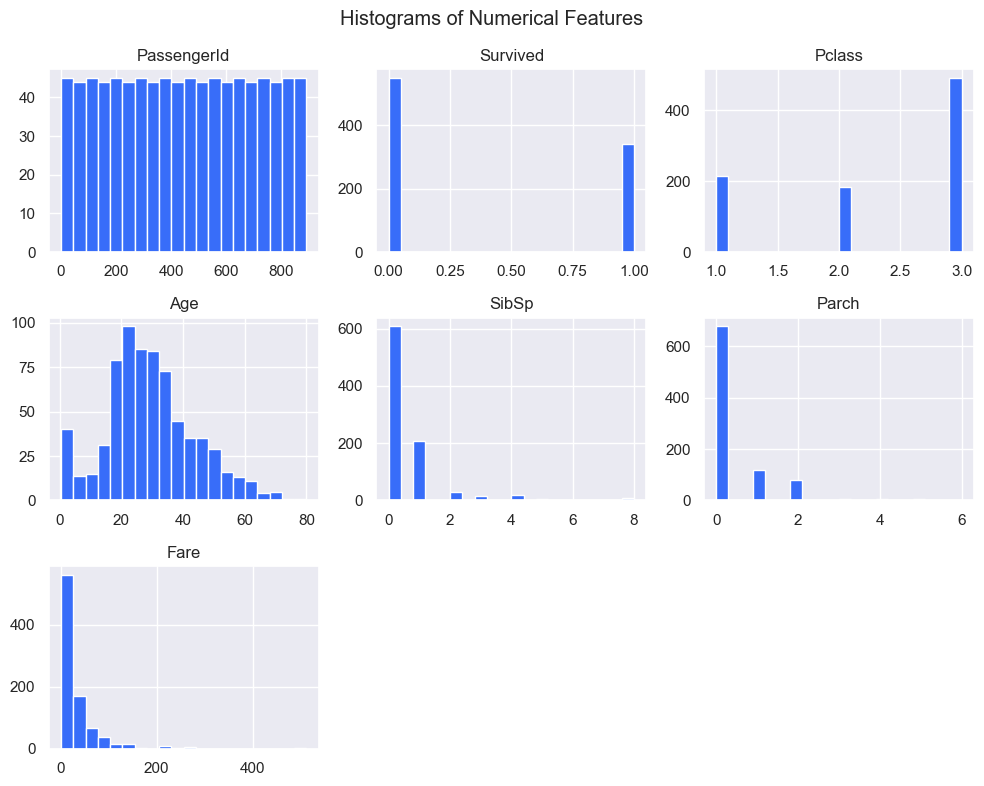

In [10]:
# Histogram for numerical features
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

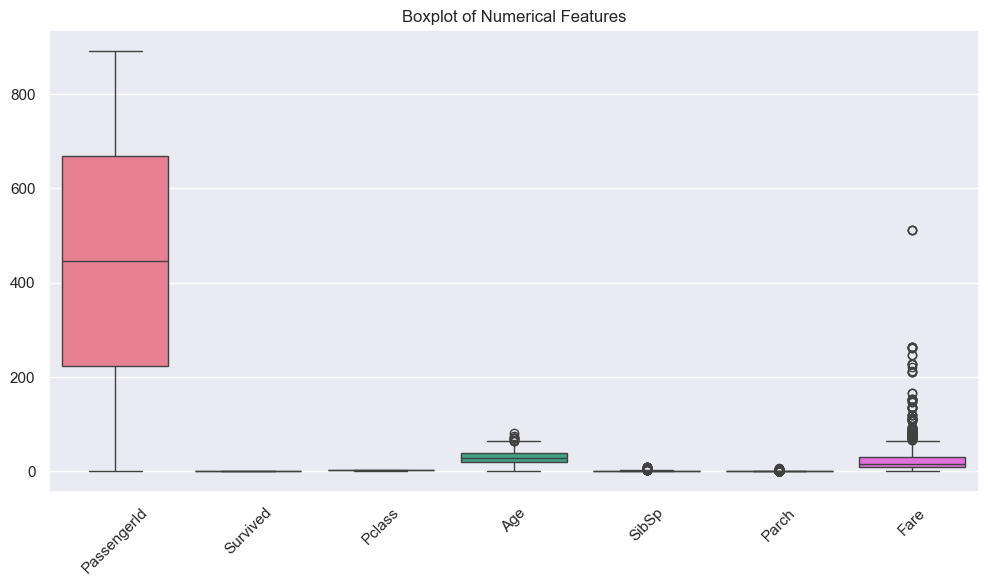

In [11]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

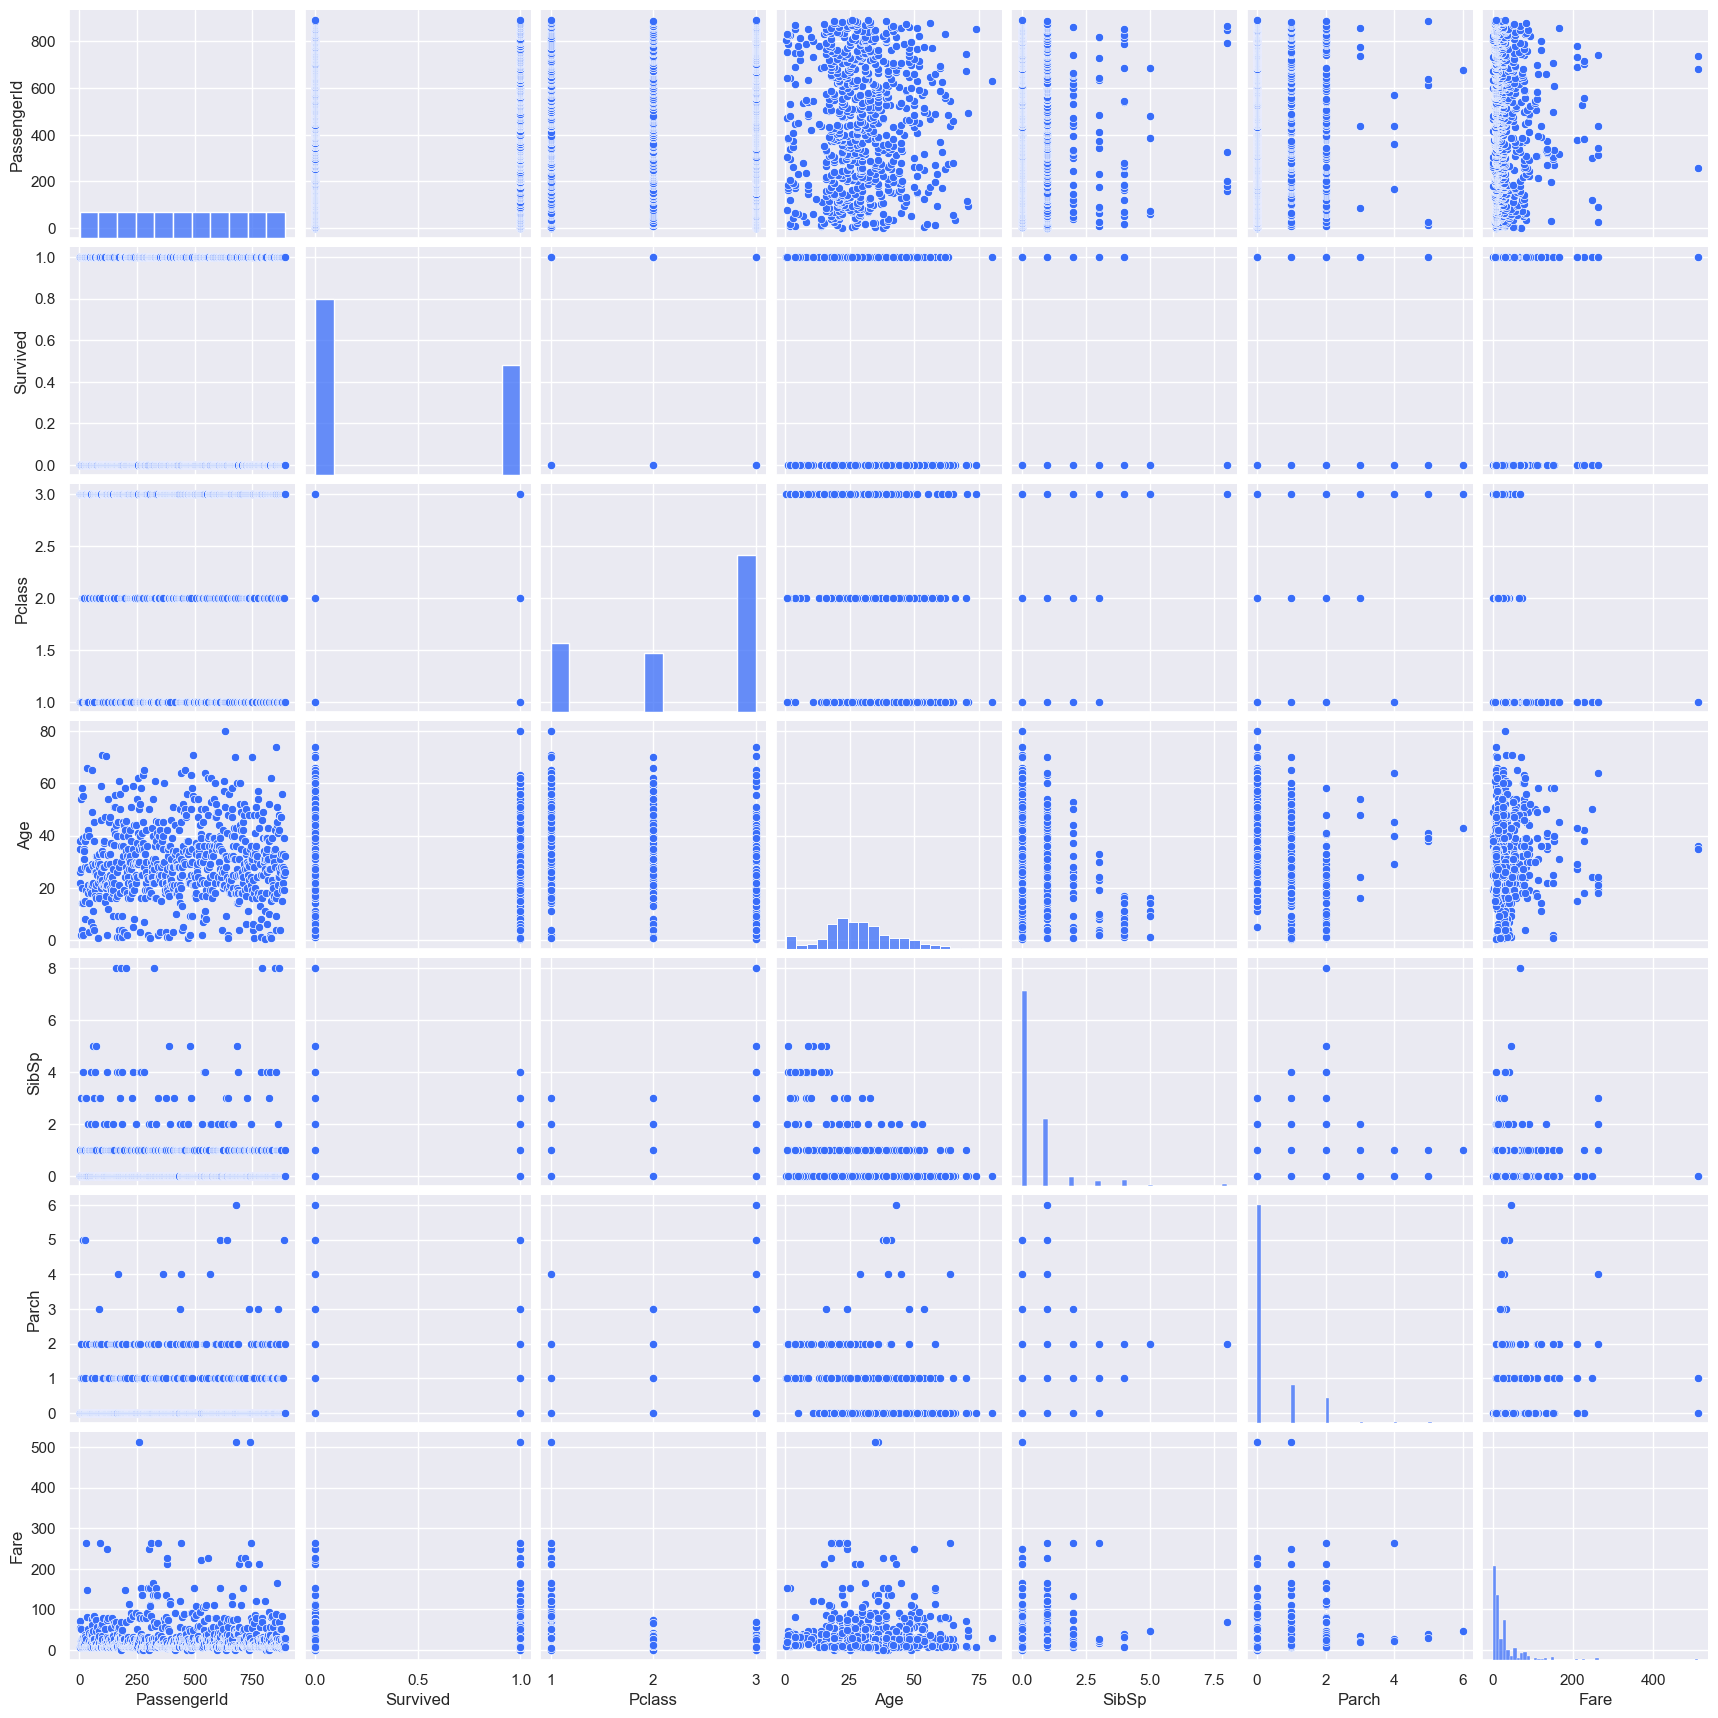

In [12]:
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

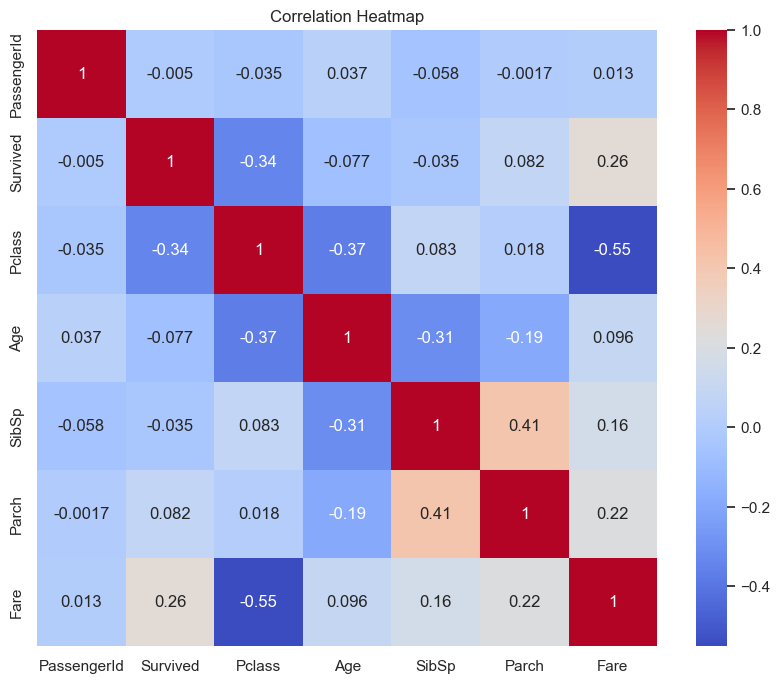

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 2. Data Preprocessing:

In [14]:
# check missing value 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Impute missing values
numeric_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns


In [16]:
# Impute numerical with mean
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
num_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])


In [17]:
# Impute categorical with most frequent (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [18]:
# Label Encoding for categorical columns
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [19]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [20]:
# Label encode all categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [21]:
print(df.head())

   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0          1.0       0.0     3.0   108    1  22.0    1.0    0.0     523   
1          2.0       1.0     1.0   190    0  38.0    1.0    0.0     596   
2          3.0       1.0     3.0   353    0  26.0    0.0    0.0     669   
3          4.0       1.0     1.0   272    0  35.0    1.0    0.0      49   
4          5.0       0.0     3.0    15    1  35.0    0.0    0.0     472   

      Fare  Cabin  Embarked  
0   7.2500     47         2  
1  71.2833     81         0  
2   7.9250     47         2  
3  53.1000     55         2  
4   8.0500     47         2  


# 3. Model Building:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
# matrix and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [24]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
y_pred = model.predict(X_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877

Confusion Matrix:
[[89 16]
 [18 56]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       105
         1.0       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# 4. Model Evaluation:


In [29]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [32]:
# For ROC AUC, we need probability scores
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

In [33]:
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1-score     : {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy     : 0.8101
Precision    : 0.7778
Recall       : 0.7568
F1-score     : 0.7671
ROC-AUC Score: 0.8740


In [34]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       105
         1.0       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[89 16]
 [18 56]]


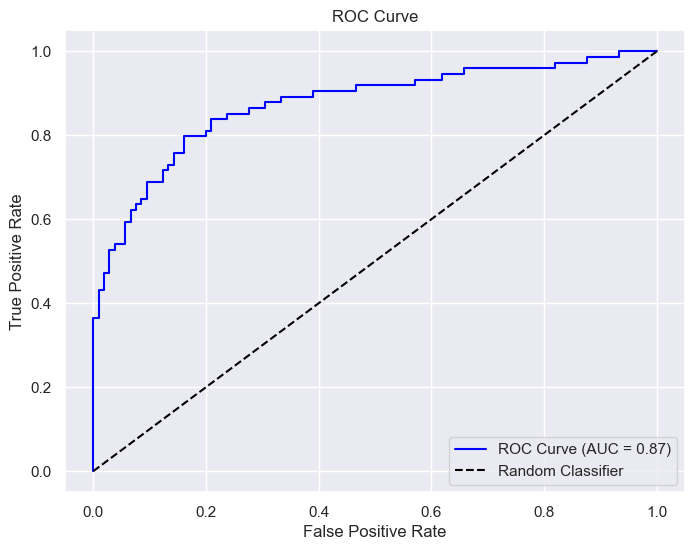

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 5. Interpretation:

In [36]:
# Get features names and corresponding coffiient
coefficients = model.coef_[0]
feature_names=X.columns

# create dataframe 
coef_df=pd.DataFrame({'Feature': feature_names,
    'Coefficient': coefficients
})

In [37]:
# Sort by absolute coefficient value (importance)
coef_df['Abs(Coefficient)'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs(Coefficient)', ascending=False)

print(coef_df[['Feature', 'Coefficient']])

        Feature  Coefficient
3           Sex    -2.660642
1        Pclass    -0.749978
5         SibSp    -0.277477
10     Embarked    -0.226518
6         Parch    -0.196494
4           Age    -0.029042
9         Cabin     0.010272
8          Fare     0.003758
2          Name    -0.000565
7        Ticket    -0.000532
0   PassengerId     0.000386


# 6. Deployment with Streamlit:

In [38]:
import pickle

# Assume your trained model variable is called 'model'
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)
